In [ ]:
import pandas as pd

df = pd.read_excel("CO2_Emission_Classification_5000_Records.xlsx")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (5000, 8)


,Year,Transport,Industry,Residential,Energy,Agriculture,Total_Emissions,Emission_Class
0,2076,973.383260,1112.460286,1431.827962,1272.846994,825.204471,5615.722972,High
1,2039,711.193269,1071.674700,1331.144469,1281.358401,756.303557,5151.674396,High
2,2096,690.408906,840.056208,1345.076668,1160.059179,916.644215,4952.245176,Medium
3,2085,919.475412,883.469035,1520.967187,1072.977627,631.460127,5028.349389,High
4,2045,839.599245,1080.045389,1298.428229,1200.758785,699.951330,5118.782978,High


In [ ]:
X = df[['Transport', 'Industry', 'Residential', 'Energy', 'Agriculture']]
y = df['Emission_Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        High       0.96      1.00      0.98       865
      Medium       0.98      0.71      0.82       135

    accuracy                           0.96      1000
   macro avg       0.97      0.85      0.90      1000
weighted avg       0.96      0.96      0.96      1000



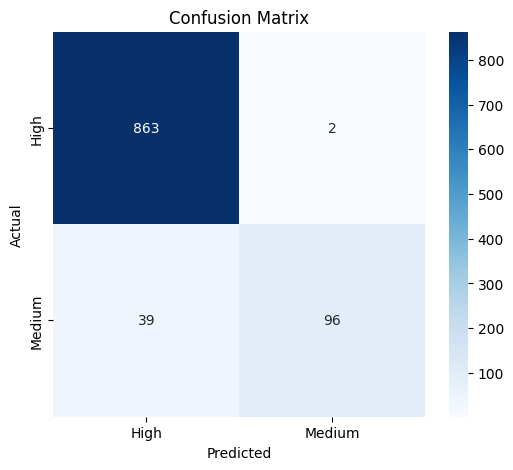

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()